# Representing time with datetimes

[strftime.org](https://strftime.org/)


In [ ]:
from datetime import datetime
black_monday = datetime(1987, 10, 19)
print(black_monday) 

1987-10-19 00:00:00


In [ ]:
# Now in EUA
# strftime
today = datetime.now()
string_today = today.strftime('%A, %B %d, %Y. %I:%M %p')
print(string_today)

Friday, October 23, 2020. 09:04 PM


In [ ]:
# String for date
# strptime
today_again = datetime.strptime(string_today, '%A, %B %d, %Y. %I:%M %p')
print(today_again)

2020-10-23 21:04:00


# Working with datetime

## Datetime attributes

In [ ]:
# .day, .month, .year, .minute, .hour, .second
today_hour = today_again.hour
today_day = today_again.day
today_month = today_again.month
today_year = today_again.year

print(f'\n Hour: {today_hour} \n Day:{today_day} \n Month:{today_month} \n Year:{today_year}')


 Hour: 21 
 Day:23 
 Month:10 
 Year:2020


## Comparing datetimes


In [ ]:
asian_crisis = datetime(1997, 7, 2)
world_mini_crash = datetime(1997, 10, 27)

print(asian_crisis > world_mini_crash)
print(asian_crisis < world_mini_crash)
print(asian_crisis == world_mini_crash)

False
True
False


## Timedelta

In [ ]:
delta = world_mini_crash - asian_crisis
print(type(delta))
print(delta)

<class 'datetime.timedelta'>
117 days, 0:00:00


In [ ]:
from datetime import timedelta
offset = timedelta(weeks = 1)  # using weeks
print(offset)

print(asian_crisis)
week_before = asian_crisis - offset

print(week_before)

7 days, 0:00:00
1997-07-02 00:00:00
1997-06-25 00:00:00


In [ ]:
offset = timedelta(days = 7)  # using days 
print(offset)

print(asian_crisis)
week_after = asian_crisis + offset

print(week_after)

7 days, 0:00:00
1997-07-02 00:00:00
1997-07-09 00:00:00


# Negating with boolean operators

In [ ]:
market_closed = False
closing_prices = []  # False
print(closing_prices)

# Assigning True if we need to get the prices
not_prices = not closing_prices 

print(not_prices)

# Get prices if market is closed and we don't have prices
get_prices = not (market_closed and not_prices)

print(get_prices)

[]
True
True


In [ ]:
# Assign a default action if no input
input_action = input("Input action?")
action = input_action or "Hold"

# Print the action
print(action)

# Assign action only if trades can be made
is_trading_day = input('Is trading day?')
do_action = is_trading_day and action

# Print the action to do
print(f'Do action?: {do_action}')

Input action?false
false
Is trading day?true
Do action?: false


# DataFrame with Pandas

`pd.DataFrame()`

## Reading data

![](https://lh3.googleusercontent.com/pw/ACtC-3dFMAYx_cprz_1HnfWq8_cjWKr-v5_WynH9Mj-XJb6okXzFV6hGek_bW8a9cbyJmrO9tAtxGyUD6E5votXgEp4EORCvgez63iCKTMmD-HwuZgP2-ltw9luKZtGYJNJVD3TlQiQuOzZFJqwhqm7Ajroh=w255-h279-no?authuser=0)

In [ ]:
import pandas as pd

In [ ]:
# First way
data = {'Bank': ['BA', 'AAD', 'BA'],
        'Account#':['ajfdk2', '1234nmk', 'mm3d90'],
        'Balance': [1222.00, 390789.66, 13.02]}

df = pd.DataFrame(data)
display(df)

,Bank,Account#,Balance
0,BA,ajfdk2,1222.00
1,AAD,1234nmk,390789.66
2,BA,mm3d90,13.02


In [ ]:
# Second way
data = [{'Bank': 'BA', 'Account#': 'ajfdk2', 'Balance': 1222.00},
        {'Bank': 'AAD', 'Account#': '1234nmk', 'Balance': 390789.66},
        {'Bank': 'BA', 'Account#': 'mm3d90', 'Balance': 13.02}]
  
df = pd.DataFrame(data)
display(df)

,Bank,Account#,Balance
0,BA,ajfdk2,1222.00
1,AAD,1234nmk,390789.66
2,BA,mm3d90,13.02


In [ ]:
# Third way
data = [['BA',  'ajfdk2',  1222.00],
        ['AAD', '1234nmk', 390789.11],   
        ['BA',  'mm3d90',  13.02]]    

columns = ['Bank Code', 'Account#', 'Balance']
df = pd.DataFrame(data=data, columns=columns)
display(df)

,Bank Code,Account#,Balance
0,BA,ajfdk2,1222.00
1,AAD,1234nmk,390789.11
2,BA,mm3d90,13.02


In [ ]:
train = pd.read_csv('sample_data/california_housing_test.csv')
display(train)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0
...,...,...,...,...,...,...,...,...,...
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708,162500.0


# Acessing data

In [ ]:
# Using .loc
df.loc[:, 'Bank Code']
df.loc[1:, 'Balance']
df.loc[1:, ]
df.loc[2, 'Balance']
df.loc[[0,1], 'Account#']
df.loc[0, ['Bank Code', 'Balance']]

Bank Code      BA
Balance      1222
Name: 0, dtype: object

In [ ]:
# Using .iloc
df.iloc[:, 0]
df.iloc[1, -1]
df.iloc[0, 0:3:2]

Bank Code      BA
Balance      1222
Name: 0, dtype: object

# Aggregating and summarizing

![](https://lh3.googleusercontent.com/pw/ACtC-3eyVbZMUbVXdPohgUHbHDXCh06Vrs3DmTWTULM_t8LhtmtFiPYkWt4ebDgWIxtRplOZ8N0oQ-t9BQkn75gYJbkZsRaBeM2TwfUD-NzUjTI9AOd1fZew7IXuWr2ryMg6aih91wG1HlU3gS8KSWkDCN8g=w479-h231-no?authuser=0)


In [ ]:
data = {'OPEN': [299.22, 322.93, 330.49, 299.23],
        'HI':[323.32, 349.21, 342.22, 299.23],
        'LOW': [330.22, 332.00, 299.23, 230.20],
        'CLOSE':[322.99, 330.49, 299.23, 230.30]}
index = ['2020-01-02', '2020-01-03', '2020-01-04', '2020-01-05']
prices = pd.DataFrame(data, index= index)
display(prices)

,OPEN,HI,LOW,CLOSE
2020-01-02,299.22,323.32,330.22,322.99
2020-01-03,322.93,349.21,332.00,330.49
2020-01-04,330.49,342.22,299.23,299.23
2020-01-05,299.23,299.23,230.20,230.30


In [ ]:
# Get the median of the opening prices
med_open = prices.loc[:, 'OPEN'].median()

# Get the median of the closing prices
med_close = prices.loc[:, 'CLOSE'].median()

if med_open < med_close:
    print("Trending down.")

Trending down.


# Extending and manipulating data

In [ ]:
prices['MEAN'] = prices.mean(axis=1)
display(prices)

,OPEN,HI,LOW,CLOSE,MEAN
2020-01-02,299.22,323.32,330.22,322.99,318.9375
2020-01-03,322.93,349.21,332.00,330.49,333.6575
2020-01-04,330.49,342.22,299.23,299.23,317.7925
2020-01-05,299.23,299.23,230.20,230.30,264.7400


In [ ]:
prices['SUM_COL'] = prices.sum(axis=1)
display(prices)

,OPEN,HI,LOW,CLOSE,MEAN,SUM_COL
2020-01-02,299.22,323.32,330.22,322.99,318.9375,1594.6875
2020-01-03,322.93,349.21,332.00,330.49,333.6575,1668.2875
2020-01-04,330.49,342.22,299.23,299.23,317.7925,1588.9625
2020-01-05,299.23,299.23,230.20,230.30,264.7400,1323.7000


In [ ]:
# Dropping columns from DataFrame
columns_to_drop = ['MEAN', 'SUM_COL']
prices.drop(columns= columns_to_drop, inplace=True)
display(prices)

,OPEN,HI,LOW,CLOSE
2020-01-02,299.22,323.32,330.22,322.99
2020-01-03,322.93,349.21,332.00,330.49
2020-01-04,330.49,342.22,299.23,299.23
2020-01-05,299.23,299.23,230.20,230.30


# Describe

In [ ]:
prices.describe()

,OPEN,HI,LOW,CLOSE
count,4.000000,4.000000,4.000000,4.000000
mean,312.967500,328.495000,297.912500,295.752500
std,16.165829,22.365954,47.583088,45.624182
min,299.220000,299.230000,230.200000,230.300000
25%,299.227500,317.297500,281.972500,281.997500
50%,311.080000,332.770000,314.725000,311.110000
75%,324.820000,343.967500,330.665000,324.865000
max,330.490000,349.210000,332.000000,330.490000


In [ ]:
prices.describe(percentiles=[.1, .5, .7, .9])

,OPEN,HI,LOW,CLOSE
count,4.000000,4.000000,4.000000,4.000000
mean,312.967500,328.495000,297.912500,295.752500
std,16.165829,22.365954,47.583088,45.624182
min,299.220000,299.230000,230.200000,230.300000
10%,299.223000,306.457000,250.909000,250.979000
50%,311.080000,332.770000,314.725000,311.110000
70%,323.686000,342.919000,330.398000,323.740000
90%,328.222000,347.113000,331.466000,328.240000
max,330.490000,349.210000,332.000000,330.490000


# Filtering data

In [ ]:
prices.index

Index(['2020-01-02', '2020-01-03', '2020-01-04', '2020-01-05'], dtype='object')

In [ ]:
mask = prices.HI > int(prices['HI'].mean())
mask_date = prices.index >= str(datetime(2020, 1, 3)) 

total_mask = mask & mask_date

In [ ]:
prices.loc[total_mask]

,OPEN,HI,LOW,CLOSE
2020-01-04,330.49,342.22,299.23,299.23


# Plotting data


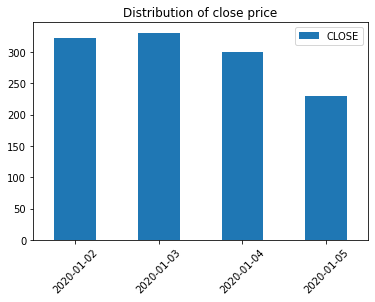

In [ ]:
prices.plot(y= 'CLOSE', kind= 'bar', rot = 45, title='Distribution of close price')

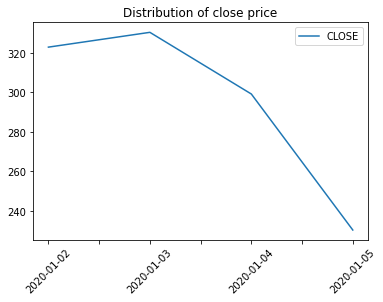

In [ ]:
prices.plot(y= 'CLOSE', kind= 'line', rot = 45, title='Distribution of close price')

# Wrapping up

In [ ]:
alphabet = pd.read_csv('/content/drive/My Drive/Arquivos/HistoricalQuotes.csv', index_col = 'date', parse_dates= True)
alphabet.drop(alphabet.index[0], inplace= True)
alphabet = alphabet.astype(float)
alphabet.head()

,close,volume,open,high,low
date,,,,,
2019-08-02,1196.32,1745450.0,1203.00,1209.500,1190.00
2019-08-01,1211.78,1771271.0,1217.63,1236.298,1207.00
2019-07-31,1218.20,1997999.0,1224.87,1234.910,1208.18
2019-07-30,1228.00,1430775.0,1227.00,1236.910,1225.32
2019-07-29,1241.84,2069127.0,1242.50,1248.995,1230.20


In [ ]:
# number of days
timedelta_alphabet = alphabet.head(1).index - alphabet.tail(1).index
int(timedelta_alphabet.days.values) 

4099

In [ ]:
alphabet['returns'] = alphabet['close'].pct_change()

alphabet.head()

,close,volume,open,high,low,returns
date,,,,,,
2019-08-02,1196.32,1745450.0,1203.00,1209.500,1190.00,NaN
2019-08-01,1211.78,1771271.0,1217.63,1236.298,1207.00,0.012923
2019-07-31,1218.20,1997999.0,1224.87,1234.910,1208.18,0.005298
2019-07-30,1228.00,1430775.0,1227.00,1236.910,1225.32,0.008045
2019-07-29,1241.84,2069127.0,1242.50,1248.995,1230.20,0.011270


In [ ]:
mean = alphabet.close.mean()
median = alphabet.close.median()
alphabet.query('close > @mean & close > @median')

,close,volume,open,high,low,returns
date,,,,,,
2019-08-02,1196.3200,1745450.0,1203.0000,1209.5000,1190.0000,NaN
2019-08-01,1211.7800,1771271.0,1217.6300,1236.2980,1207.0000,0.012923
2019-07-31,1218.2000,1997999.0,1224.8700,1234.9100,1208.1800,0.005298
2019-07-30,1228.0000,1430775.0,1227.0000,1236.9100,1225.3200,0.008045
2019-07-29,1241.8400,2069127.0,1242.5000,1248.9950,1230.2000,0.011270
...,...,...,...,...,...,...
2014-02-28,614.0794,2313176.0,616.4485,618.3933,609.3159,0.010776
2014-02-27,615.8777,1259795.0,615.4635,618.4161,614.7669,0.002928
2014-02-26,616.3627,1982121.0,618.2974,620.7625,613.1247,0.000787


In [ ]:
# Get the median of the opening prices
med_open = alphabet.loc[:, 'open'].median()

# Get the median of the closing prices
med_close = alphabet.loc[:, 'close'].median()

if med_open < med_close:
    print("Trending down.")
else:
    print("Trending up")

Trending up


In [ ]:
alphabet.describe()

,close,volume,open,high,low,returns
count,2518.000000,2.518000e+03,2518.000000,2518.000000,2518.000000,2517.000000
mean,612.300264,2.278235e+06,612.388284,617.484990,606.824462,-0.000542
std,311.029653,1.256103e+06,310.956806,313.720854,308.055488,0.015183
min,220.278500,5.211410e+05,221.410100,223.417600,219.046000,-0.139847
25%,309.344400,1.518603e+06,309.113350,312.043200,306.689875,-0.008275
50%,550.887500,1.976994e+06,551.100000,556.012500,546.590650,-0.000646
75%,830.720000,2.619222e+06,831.457500,837.762500,826.200125,0.006409
max,1296.200000,1.480348e+07,1289.120000,1296.975000,1271.710000,0.091435


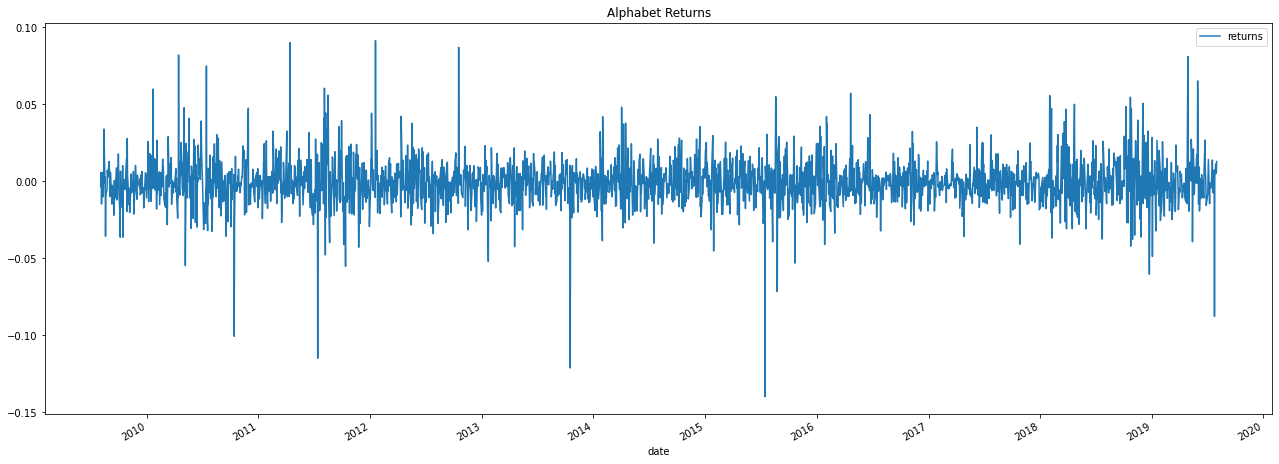

In [ ]:
# plot
alphabet.plot(y = 'returns', kind = 'line', figsize=(22,8), title = 'Alphabet Returns')

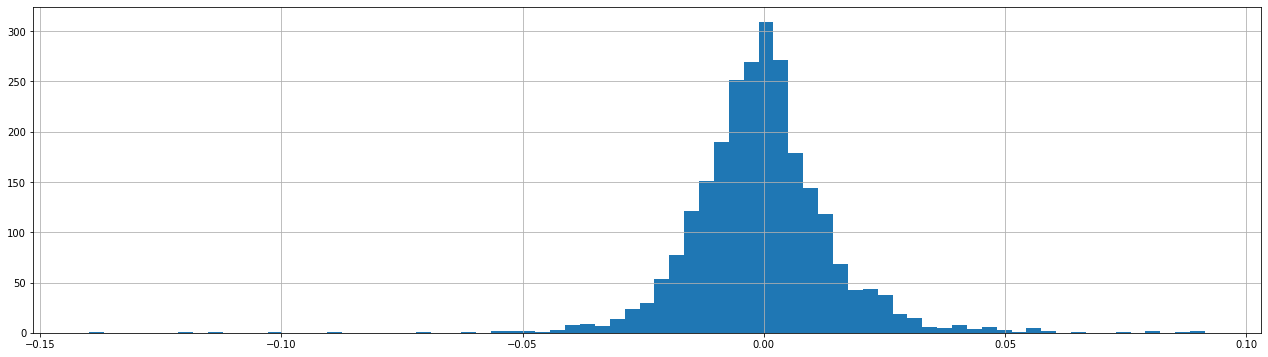

In [ ]:
alphabet.returns.hist(bins = 75, figsize=(22,6))

In [ ]:
alphabet.head()

,close,volume,open,high,low
date,,,,,
2020-10-23 13:33:00,"1,155.14","1,145,529","1,172","1,176.88","1,152"
2019-08-02 00:00:00,1196.3200,1745450.0000,1203.0000,1209.5000,1190.0000
2019-08-01 00:00:00,1211.7800,1771271.0000,1217.6300,1236.2980,1207.0000
2019-07-31 00:00:00,1218.2000,1997999.0000,1224.8700,1234.9100,1208.1800
2019-07-30 00:00:00,1228.0000,1430775.0000,1227.0000,1236.9100,1225.3200


# The time value of money

In [1]:
# Predefined variables
initial_investment = 100
growth_periods = 30
growth_rate = 0.06

# Calculate the value for the investment compounded once per year
compound_periods_1 = 1
investment_1 = initial_investment*(1 + growth_rate / compound_periods_1)**(compound_periods_1*growth_periods)
print("Investment 1: " + str(round(investment_1, 2)))

# Calculate the value for the investment compounded quarterly
compound_periods_2 = 4
investment_2 = initial_investment*(1 + growth_rate / compound_periods_2)**(compound_periods_2*growth_periods)
print("Investment 2: " + str(round(investment_2, 2)))

# Calculate the value for the investment compounded monthly
compound_periods_3 = 12
investment_3 = initial_investment*(1 + growth_rate / compound_periods_3)**(compound_periods_3*growth_periods)
print("Investment 3: " + str(round(investment_3, 2)))

Investment 1: 574.35
Investment 2: 596.93
Investment 3: 602.26


In [2]:
# Calculate the future value
initial_investment = 100
growth_rate = -0.05
growth_periods = 10
future_value = initial_investment*(1 + growth_rate)**(growth_periods)
print("Future value: " + str(round(future_value, 2)))

# Calculate the discount factor
discount_factor = 1/((1 + growth_rate)**(growth_periods))
print("Discount factor: " + str(round(discount_factor, 2)))

# Derive the initial value of the investment
initial_investment_again = future_value * discount_factor
print("Initial value: " + str(round(initial_investment_again, 2)))

Future value: 59.87
Discount factor: 1.67
Initial value: 100.0
